<H1> Lab 6 </H1>

<H2> Function block </H2>

<H3>
Draw plot
</H3>

In [69]:


from re import A
from xml.etree.ElementTree import QName
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import pandas as pd

def plpl(foo, x: list[float],y: list[float]) -> list[float]:
    c =[]
    tmp = [1,1]
    for i in range(len(x)):
        #print(i)
        if i > 0:
            if c[-1] != foo(x[i],y[i]):     
                c.append(foo(x[i],y[i]))
        else:
            c.append(foo(x[i],y[i]))
    #с = set(c)
    #c.sort()
    #print(c)
    return c

def plpl1(foo, x: list[float],y: list[float]) -> list[float]:
    c =[]
    tmp = [1,1]
    for i in range(len(x)):
        #print(i)
        
        c.append(foo(x[i],y[i]))
    #с = set(c)
    #c.sort()
    #print(c)
    return c

def draw_counterplot(x_min, xk, flag, foo):
    fig, ax = plt.subplots(figsize = (5,5))

    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = v)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    #ax.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax.grid(linestyle = '-')



    pass

def draw_counterplot1(x_min, xk, A, flag, foo):
    fig, ax = plt.subplots(figsize = (5,5))

    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = v)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')

    for k in range(1,len(A[0])):
        
        ax.plot ([A[0][k-1],A[0][k]], [A[1][k-1],A[1][k]], marker='o', markersize = 3, color = 'green')
        #ax.plot (A[0][k], A[1][k], marker='o', markersize = 3, color = 'green')


    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    ax.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax.grid(linestyle = '-')



    pass

def draw_all(x0, x_min, xk, flag, foo, ang_a = 20, ang_b = 145):

    fig = plt.figure(figsize = (15, 5), dpi=120)

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)
    #ax3 = fig.add_subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0.7)

    coef = max(abs(x0[0] - x_min[0]), abs(x0[1]-x_min[1]))
    #coef = max(abs( min(xk[0]) - x_min[0]), abs(min(xk[1])-x_min[1]))
    x, y = np.meshgrid(np.linspace(x_min[0] - coef, x_min[0] + coef, 100),np.linspace(x_min[1] - coef, x_min[1] + coef, 100))
    z = foo(x, y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    

    ax1.plot_surface(x,y,z, cmap = 'plasma', alpha = 0.5)
    ax1.contour3D(x,y,z, 120, cmap = 'plasma', alpha = 0.3)
    ax1.contour3D(x,y,z, levels = v, colors = 'black', alpha = 0.5) #cmap = 'tab20')

    v = plpl1(foo, xk[0], xk[1])
    
    ax1.plot(xk[0], xk[1], v, marker='o', markersize = 3, color = 'red')

    ax1.scatter(xk[0][0], xk[1][0], foo(xk[0][0], xk[1][0]), s = 20, c = 'green', label="$x_{beg}$ - точка начального приближения")
    ax1.scatter(x_min[0], x_min[1], foo(x_min[0], x_min[1]), s = 20, c = 'red', label="$x_{min}$ - точка минимума")
    ax1.legend(shadow=True, fontsize=8)
    ax1.view_init(ang_a, ang_b)
    ax1.set_xlabel('$x$', fontsize = 12)
    ax1.set_ylabel('$y$', fontsize = 12)
    ax1.set_zlabel('$z$', fontsize = 12)
    ax1.set_title('График поверхности функции', fontdict = {'fontsize' : 14})


    #x, y = np.meshgrid(xk[0], xk[1])
    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    # построим линии уровня
    ax2.contour(x, y, z, v)
    # траектория поиска точки минимума
    ax2.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax2.set_xlabel('$x$', fontsize = 12)
    ax2.set_ylabel('$y$', fontsize = 12)
    ax2.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax2.grid(linestyle = '-')

    # k = range(len(w_norm))
    # #x, y = np.meshgrid(k , w_norm)
    # ax3.plot(k, w_norm)
    # ax3.set_xlabel('$k$')
    # ax3.set_ylabel('$ \| \! \| w_k \| \! \| $')
    # ax3.set_title('Зависимость нормы \n антиградиента $ \| \! \| w_k \| \! \| $ от параметра $k$')



    pass




<H3> Golden Ratio </H3>

In [2]:
import numpy as np
import math
eps = 10**(-2)
def method_goldenRatio(f, b: float = 1, a: float = 0, e = eps * 1e-1):
    tau = (math.sqrt(5) + 1) / 2
    n_f = 0
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / tau
    Xk2 = Ak + (Bk - Ak) / tau
    
    y1, y2 = f(Xk1), f(Xk2)
    n_f += 2

    while lk >= e:
        if y1 < y2:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
            n_f += 1 
        else:
            
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
            n_f += 1
            
        lk = Bk - Ak
    return (Ak + Bk) / 2, n_f


<H3> Straight optimization

In [3]:
from cmath import sqrt
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize

x0 = [-1, -2]
e = 10 ** (-16)
def vec_rav(a, b) -> bool:
    for i in range(len(a)):
        if a[i] != b[i]:
            return False
    return True
    
def straight_optimization(foo, eps = e, x = np.array(x0), flag: int = 0, flag1: int = 0, n_dim: int = 2):

    n_f = 0
    n_g = 0
    n_d = 0


    golden_param = 2.7
    beta_k = 1    
    x = np.array(x)
    
    f = lambda x: foo(x[0], x[1])

    xk = [[],[]]
    xk[0].append(x[0])
    xk[1].append(x[1])

    n = n_dim #hess.ndim #момент обновления алгоритма
    basis = np.identity(n_dim)

    x_prev = x
    b = np.array([1/2, 1/2])
    gamma = 0.5

    #basis_iter_mas = [[],[]]
    #fj = f(x)
    pk = np.copy(basis)

    

    #while np.linalg.norm(x - x_prev) > eps:
    while True:
        n_d += 1        
                
        if flag == 0:
            x_prev = x

            for j in range(n):
                ej = basis[j]
                phi_k = lambda beta: f(x + beta * ej)
                temp = 0 
                #beta_k, temp = method_goldenRatio(phi_k, golden_param, -golden_param, eps/1000)
                beta_k, nnn, temp = optimize.golden(phi_k, full_output=True) 
                n_f += temp
                x = x + beta_k * ej
                xk[0].append(x[0])
                xk[1].append(x[1])
            
            if  np.linalg.norm(x - x_prev) < eps:
                break
        
        elif flag == 1:


            if xk[0][-1] != x[0] and xk[1][-1] != x[1]:
                xk[0].append(x[0])
                xk[1].append(x[1])

            x_save = x_prev
            x_prev = x
            xj = x_prev

            for j in range(n):
                
                ej = basis[j]

                fj = f(xj)
                f_plus_j = f(xj + b[j] * ej)
                f_minus_j = f(xj - b[j] * ej)

                if f_plus_j < fj and f_plus_j <= f_minus_j:
                    xj = xj + b[j] * ej
                elif f_minus_j < fj and f_plus_j > f_minus_j:
                    xj = xj - b[j] * ej 

                if xk[0][-1] != xj[0] and xk[1][-1] != xj[1]:
                    xk[0].append(xj[0])
                    xk[1].append(xj[1])
                    # basis_iter_mas[0].append(xj[0])
                    # basis_iter_mas[1].append(xj[1])

            if vec_rav(xj, x_prev):
                b = gamma * b
                x = x_prev
                x_prev = x_save 
                if np.linalg.norm(b) < eps / 1000:
                    break
            else:  

                if np.linalg.norm(xj - x_prev) < eps:
                    break
            
                x = xj 
                phi_k = lambda a_k: f(x_prev + a_k * (xj - x_prev))
                temp = 0 
                #a_k, temp = method_goldenRatio(phi_k, 1, 0, eps/1000)
                #a_k, temp = method_goldenRatio(phi_k, 4, -4, eps/100)

                a_k, nnn, temp = optimize.golden(phi_k, brack=(0,1), full_output=True) 
                n_f += temp                
                x = x_prev + a_k * (xj - x_prev)

                if xk[0][-1] != x[0] and xk[1][-1] != x[1]:
                    xk[0].append(x[0])
                    xk[1].append(x[1])
                

            if np.linalg.norm(x - x_prev) < eps:
                break

        if flag == 2:
            

            
            x_prev = x
            xj = x

            kappa_mas = []
            aj_mas = []
            bj_mas = []


            for j in range(n):

                phi = lambda kappa: f(xj+ kappa * pk[j])
                temp = 0
                kappa, temp = method_goldenRatio(phi, 2, -2, eps/1000)
                #kappa, nnn, temp = optimize.golden(phi, full_output=True)
                n_f += temp
                xj = xj + kappa * pk[j]
                kappa_mas.append(kappa)

                

            x = xj            
            xk[0].append(x[0])
            xk[1].append(x[1])

            if np.linalg.norm(x - x_prev) < eps:
                break
            #p = xj - x_prev
            #temp = 0
            #phi = lambda kappa: f(xj + kappa * p)
            #kappa, nnn, temp = optimize.golden(phi, brack=(0, 1) ,full_output=True)
            #n_f += temp
            #z = xj + kappa * p
            
            # n_d % n != 0:
            
            for j in range(n):
                tmp = np.array([0,0])
                if kappa_mas[j] == 0:
                    aj_mas.append(pk[j])
                else:
                    for i in range(j,n):
                        tmp = tmp + kappa_mas[i] * pk[i]                        
                    aj_mas.append(tmp)
                    #print(aj_mas)
            
            for j in range(n):
                tmp = np.copy(aj_mas[j])
                if j == 0:
                    bj_mas.append(aj_mas[j])
                else:
                    for i in range(0, j-1):
                        tmp = tmp - np.dot(aj_mas[j], pk[i]) * pk[i]
                    bj_mas.append(tmp)
            
            for j in range(n):
                pk[j] = 1 / np.linalg.norm(bj_mas[j]) * bj_mas[j]
        
            # else:
            #     x = xj
            #     xk[0].append(x[0])
            #     xk[1].append(x[1])
            #     if np.linalg.norm(x - x_prev) < eps:
            #         break
                

    # if flag == 1:
    #     return x, xk, basis_iter_mas, n_f, n_d

    return x, xk, n_f, n_d


In [4]:
from functools import reduce
import numpy as np
B = np.array([[1/2, 0], [-1 , 0]])#
C = np.array([1/2,-1])
R = np.array([1/2,1])
#print(np.dot(C, B), np.dot(B.T, C))
#print(B.dot(B.T))
#r = np.ones(2, 4)
#print(r)
#x = np.zeros(2)
basis = []
print(type(basis))

n_dim = 2
# for i in range(n_dim):
#         e = [0] * (n_dim - 1)
#         e.insert(i, 1)
#         basis.append(np.array(e))

basis = np.identity(n_dim)
print(basis[0])
print(vec_rav(C, R))
b = np.array([2, 3])
b = 0.8 * b 
# 

#print(np.dot(C, T))
#np.matrix.transpose(C)

y = np.copy(C)
#y = C

y[1] = 0

for i in range(0,3):
    print(i)


<class 'list'>
[1. 0.]
False
0
1
2


<H3> Print function </H3>

In [5]:
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import math

#x0 = [-1,-2]
def print_res(foo, x0 = x0, e_help = 2, flag = 0, flag1 = 0):

    #tabledata = []

    x_, y_ = Symbol('x'), Symbol('y')
    eps = 10**(-e_help)

    print("\n", ' ' * 30, "Мтоды покоординатного спуска","\n")
    print("Дано:")
    print("-" * 24)
    print("      Целевая функция:    f(x, y) =", foo(x_,y_))
    print("Начальное приближение:    (x, y) =", x0)
    print(" Точность приближения:    eps =", eps)
    print("-" * 24)

    for i in range (3):
        #temp = []
        #print("\n" + "_" * 80)

        if i == 0:
            method_name = "Метод покоординатного спуска"
            print("\n", ' ' * 30, f"{method_name} \n")
        elif i == 1:
            method_name = "Метод Хука-Дживса"
            print("\n", ' ' * 30, f"{method_name} \n")
        elif i == 2:
            method_name = "Метод Розенброка"
            print("\n", ' ' * 30, f"{method_name} \n")
        
        
        #x_min, xk, w_norm, n_f, n_g , n_d = straight_optimization(foo, eps, x0, i, flag1)
        x_min, xk, n_f, n_d = straight_optimization(foo, eps, x0, i)
        
        print("             Точка минимума функции:     x_min =", [round(x_min[0], e_help), round(x_min[1], e_help)])
        print("  Значение функции в точке минимума:  f(x_min) =", round(foo(x_min[0], x_min[1]), e_help))
        print("                Количество итераций:         k =",   n_d)#len(w_norm) - 1)
        print("      Количество вычислений функции:       n_f =", n_f)
        #print("  Количество вычисленных градиентов:       n_g =", n_g)
        #print("Количество вычисленных матриц Гессе:    n_hess =", n_hess)
        draw_counterplot(x_min, xk,  i, foo)
        

        #print(xk)
        #draw_counterplot_only(x_min, xk, w_norm, i, fk)
        plt.show()
    
    #a = print_tables(tabledata)


    pass



[0.89462906 0.80036116] 0.01110303400872525 191 7980


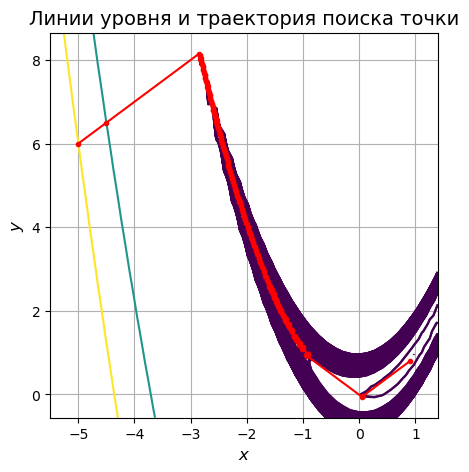

In [6]:
import numpy as np
import math

alpha = 15
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
#foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2* y) +22
# h = lambdify((x_, y_), [[diff(foo(x_, y_), x_, 2), diff(foo(x_, y_), x_, y_)], [diff(foo(x_, y_), y_, x_), diff(foo(x_, y_), y_, 2)]], 'numpy')
# H = lambda x: np.array(h(x[0],x[1]))

x0 = np.array([-5, 6])

#print_res(foo,x0, 2, )
#print_res(foo, x0, 3, 1)
x_min, xk,  n_f, n_d = straight_optimization(foo, 10**(-2), x0, 1)

print(x_min, foo(x_min[0], x_min[1]), n_d, n_f)
#draw_all(x0, x_min, xk, 0, foo, 30, -20)

#print(xk)
draw_counterplot(x_min, xk, 1, foo)
#draw_all(x0, x_min, xk, w_norm, 0, foo, 45, 170)

#print(xk)
# alpha = 200
# foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2

# print_res(foo, x0, 2)


<H3> Make pandas.DateFrame </H3>

In [20]:
import pandas as pd

def make_df(tabledata) -> pd.DataFrame:
        df = pd.DataFrame(tabledata, columns = ['Тип функции', 'Начальная точка', 'Точность', 'Метод', 'Точка минимума функции', 'Значение функции в точке минимума', 'Количество итераций', 'Количество вычислений функции'])#, 'Количество вычисленных градиентов']) #, 'Количество вычисленных матриц Гессе' ])
        return df

def make_df1(tabledata) -> pd.DataFrame:
        df = pd.DataFrame(tabledata, columns = ['Входные данные', 'Точка минимума функции', 'Значение функции в точке минимума', 'Количество итераций', 'Количество вычислений функции'])#, 'Количество вычисленных градиентов']) #, 'Количество вычисленных матриц Гессе' ])
        return df

<H3> Make sheets</H3>

In [62]:

from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize

#x0 = [-1,-2]
def make_sheets(foo, f_type, x0_mass = [[-1, -2]],  e_help = 2, tabledata = [], extra = -1):

    nu = 0.8
    omega = 0.5
    eps = 10**(-e_help)
    x0 = x0_mass[0]

    if f_type == 0:
        func_name = 'Квадратичная функция'
        flag = 0
    else:
        func_name = 'Функция Розенброка'
        flag = 1
        if extra != -1:
            flag = 0
    

    for j in range(len(x0_mass)):
        
        x0 = x0_mass[j]
        
        for i in range (3):
            
            if i == 0:
                method_name = "Метод покоординатного спуска"
                
            elif i == 1:
                method_name = "Метод Хука-Дживса"
            elif i == 2:
                method_name = "Метод Розенброка"
                
            x_min, xk, n_f, n_d = straight_optimization(foo, eps, x0, i, flag)
            enter = f"{func_name}\n {method_name}\n eps = {round(eps, e_help)}$ \n [x, y] = {x0} "
            temp = [func_name, x0, round(eps, e_help), method_name, [ round(x_min[0], e_help), round(x_min[1], e_help)], round(foo(x_min[0], x_min[1]), e_help), n_d, n_f] 
            #temp = [ enter, [ round(x_min[0], e_help), round(x_min[1], e_help)], round(foo(x_min[0], x_min[1]), e_help), n_d, n_f] 
            
            tabledata.append(temp)
            
    return tabledata

<H2>
Calculations
</H2>

<H3> Sheets </H3>


In [63]:
from secrets import randbelow
from tkinter import font


styles = [dict(selector="caption", props=[("text-align", "center"), ("font-size", "150%")])]

e_help = 2

x0 = [[-5, 6]]
x0_mass = [[-1,-2], [0,0], [-2,5], [-10, 18]]

#foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35

foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
tabledata1 = [] # Результаты вычислений квадратичной функции в зависимости от начальной точки
make_sheets(foo, 0, x0_mass, e_help, tabledata1)
df1 = make_df(tabledata1)


alpha = 5
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
tabledata2 = [] # Результаты вычислений функции Розенброка в зависимости от начальной точки
make_sheets(foo, 1, x0_mass, e_help, tabledata2)
df2 = make_df(tabledata2)


alpha = 50
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
tabledata2 = [] # Результаты вычислений функции Розенброка в зависимости от начальной точки
make_sheets(foo, 1, x0_mass, e_help, tabledata2)
df3 = make_df(tabledata2)

alpha = 50
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
tabledata3 = [] # Результаты вычислений функции Розенброка в зависимости от заданной точности

for i in range(2):
    if i == 0:
        e_help = 3
    else: 
        e_help = 6
    make_sheets(foo, 1, [[-1,-2]], e_help, tabledata3)

df4 = make_df(tabledata3)


In [65]:
#df1 = df1.sort_values('Метод')

df1.style.set_caption('Результаты вычислений квадратичной функции в зависимости от начальной точки').set_table_styles(styles)
#df1.to_excel('output1.xlsx', index=False, engine='xlsxwriter') 


,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции
0,Квадратичная функция,"[-1, -2]",0.010000,Метод покоординатного спуска,"[-0.0, -2.23]",-45.000000,5,508
1,Квадратичная функция,"[-1, -2]",0.010000,Метод Хука-Дживса,"[-0.0, -2.24]",-45.000000,20,131
2,Квадратичная функция,"[-1, -2]",0.010000,Метод Розенброка,"[-0.0, -2.24]",-45.000000,4,232
3,Квадратичная функция,"[0, 0]",0.010000,Метод покоординатного спуска,"[-0.0, -2.23]",-45.000000,7,684
4,Квадратичная функция,"[0, 0]",0.010000,Метод Хука-Дживса,"[-0.0, -2.24]",-45.000000,20,129
5,Квадратичная функция,"[0, 0]",0.010000,Метод Розенброка,"[0.0, -2.24]",-45.000000,4,232
6,Квадратичная функция,"[-2, 5]",0.010000,Метод покоординатного спуска,"[-0.0, -2.23]",-45.000000,9,871
7,Квадратичная функция,"[-2, 5]",0.010000,Метод Хука-Дживса,"[-0.0, -2.24]",-45.000000,24,299
8,Квадратичная функция,"[-2, 5]",0.010000,Метод Розенброка,"[-0.0, -2.24]",-45.000000,7,406
9,Квадратичная функция,"[-10, 18]",0.010000,Метод покоординатного спуска,"[-0.0, -2.23]",-45.000000,10,958


In [66]:
#df2 = df2.sort_values('Начальная точка')

df2.style.set_caption('Результаты вычислений функции Розенброка в зависимости от начальной точки, alpha = 5').set_table_styles(styles)
#df2.to_excel('output2.xlsx', engine='xlsxwriter') 


,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции
0,Функция Розенброка,"[-1, -2]",0.010000,Метод покоординатного спуска,"[0.92, 0.85]",0.010000,27,2775
1,Функция Розенброка,"[-1, -2]",0.010000,Метод Хука-Дживса,"[0.92, 0.83]",0.010000,20,605
2,Функция Розенброка,"[-1, -2]",0.010000,Метод Розенброка,"[1.0, 1.0]",0.000000,9,522
3,Функция Розенброка,"[0, 0]",0.010000,Метод покоординатного спуска,"[0.92, 0.85]",0.010000,26,2688
4,Функция Розенброка,"[0, 0]",0.010000,Метод Хука-Дживса,"[0.88, 0.75]",0.020000,14,391
5,Функция Розенброка,"[0, 0]",0.010000,Метод Розенброка,"[1.0, 1.0]",0.000000,7,406
6,Функция Розенброка,"[-2, 5]",0.010000,Метод покоординатного спуска,"[0.92, 0.85]",0.010000,36,3569
7,Функция Розенброка,"[-2, 5]",0.010000,Метод Хука-Дживса,"[0.88, 0.76]",0.010000,36,1343
8,Функция Розенброка,"[-2, 5]",0.010000,Метод Розенброка,"[1.0, 1.0]",0.000000,15,870
9,Функция Розенброка,"[-10, 18]",0.010000,Метод покоординатного спуска,"[0.92, 0.85]",0.010000,142,14155


In [67]:
#df3 = df3.sort_values('Начальная точка')

df3.style.set_caption('Результаты вычислений функции Розенброка в зависимости от начальной точки, alpha = 50').set_table_styles(styles)
#df3.to_excel('output3.xlsx', engine='xlsxwriter') 


,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции
0,Функция Розенброка,"[-1, -2]",0.010000,Метод покоординатного спуска,"[0.57, 0.33]",0.180000,25,2605
1,Функция Розенброка,"[-1, -2]",0.010000,Метод Хука-Дживса,"[0.77, 0.59]",0.050000,13,355
2,Функция Розенброка,"[-1, -2]",0.010000,Метод Розенброка,"[0.01, 0.0]",0.980000,2,116
3,Функция Розенброка,"[0, 0]",0.010000,Метод покоординатного спуска,"[0.57, 0.33]",0.180000,24,2519
4,Функция Розенброка,"[0, 0]",0.010000,Метод Хука-Дживса,"[0, 0]",1.000000,1,0
5,Функция Розенброка,"[0, 0]",0.010000,Метод Розенброка,"[1.0, 1.0]",0.000000,12,696
6,Функция Розенброка,"[-2, 5]",0.010000,Метод покоординатного спуска,"[0.6, 0.36]",0.160000,280,29744
7,Функция Розенброка,"[-2, 5]",0.010000,Метод Хука-Дживса,"[-2.0, 4.0]",9.000000,9,42
8,Функция Розенброка,"[-2, 5]",0.010000,Метод Розенброка,"[1.0, 1.0]",0.000000,27,1566
9,Функция Розенброка,"[-10, 18]",0.010000,Метод покоординатного спуска,"[0.6, 0.36]",0.160000,1275,138369


In [68]:
#df4 = df4.sort_values('Метод')
df4.style.set_caption('Результаты вычислений функции Розенброка в зависимости от заданной точности, а = 50').set_table_styles(styles)
#df4.to_excel('output4.xlsx', engine='xlsxwriter') 



,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции
0,Функция Розенброка,"[-1, -2]",0.001000,Метод покоординатного спуска,"[0.92, 0.846]",0.006000,239,26953
1,Функция Розенброка,"[-1, -2]",0.001000,Метод Хука-Дживса,"[0.863, 0.744]",0.019000,59,2147
2,Функция Розенброка,"[-1, -2]",0.001000,Метод Розенброка,"[1.0, 1.0]",0.000000,15,1020
3,Функция Розенброка,"[-1, -2]",0.000001,Метод покоординатного спуска,"[0.999911, 0.999822]",0.000000,1572,203436
4,Функция Розенброка,"[-1, -2]",0.000001,Метод Хука-Дживса,"[0.999799, 0.999596]",0.000000,1245,52953
5,Функция Розенброка,"[-1, -2]",0.000001,Метод Розенброка,"[1.0, 1.0]",0.000000,16,1376


<h3>Tables to latex

In [50]:
f = open('df1.txt', "w", encoding="utf-8")
f.write(df1.to_latex(index=False, column_format="|c|c|c|c|c|", multirow=True))
f.close()

\begin{tabular}{|c|c|c|c|c|}
\toprule
                                    Входные данные & Точка минимума функции &  Значение функции в точке минимума &  Количество итераций &  Количество вычислений функции \\
\midrule
Квадратичная функция\textbackslash n Метод покоординатного сп... &          [-0.0, -2.23] &                              -45.0 &                    5 &                            508 \\
Квадратичная функция\textbackslash n Метод Хука-Дживса\textbackslash n \$\textbackslash va... &          [-0.0, -2.24] &                              -45.0 &                   20 &                            131 \\
Квадратичная функция\textbackslash n Метод Розенброка\textbackslash n \$\textbackslash var... &          [-0.0, -2.24] &                              -45.0 &                    4 &                            232 \\
Квадратичная функция\textbackslash n Метод покоординатного сп... &          [-0.0, -2.23] &                              -45.0 &                    7 &              

/tmp/ipykernel_113449/2193091618.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df1.to_latex(index=False, column_format="|c|c|c|c|c|", multirow=True))
/tmp/ipykernel_113449/2193091618.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df1.to_latex(index=False, column_format="|c|c|c|c|c|", multicolumn=True, multirow=True))


<H2> Plots </H2>


                                Мтоды покоординатного спуска 

Дано:
------------------------
      Целевая функция:    f(x, y) = 5*x**2 + 4*x*y + 8.94427190999916*x + 2*y**2 + 8.94427190999916*y - 35
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 0.01
------------------------

                                Метод покоординатного спуска 

             Точка минимума функции:     x_min = [-0.0, -2.23]
  Значение функции в точке минимума:  f(x_min) = -45.0
                Количество итераций:         k = 5
      Количество вычислений функции:       n_f = 508


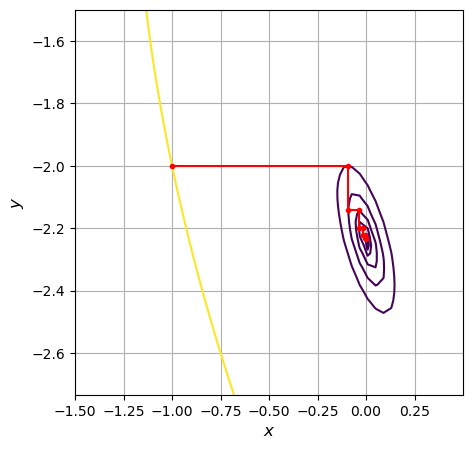


                                Метод Хука-Дживса 

             Точка минимума функции:     x_min = [-0.0, -2.24]
  Значение функции в точке минимума:  f(x_min) = -45.0
                Количество итераций:         k = 20
      Количество вычислений функции:       n_f = 131


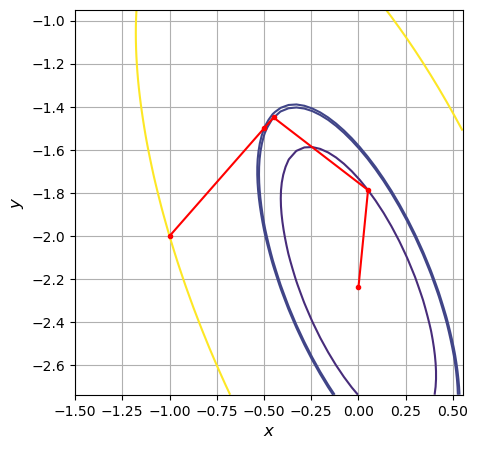


                                Метод Розенброка 

             Точка минимума функции:     x_min = [-0.0, -2.24]
  Значение функции в точке минимума:  f(x_min) = -45.0
                Количество итераций:         k = 4
      Количество вычислений функции:       n_f = 232


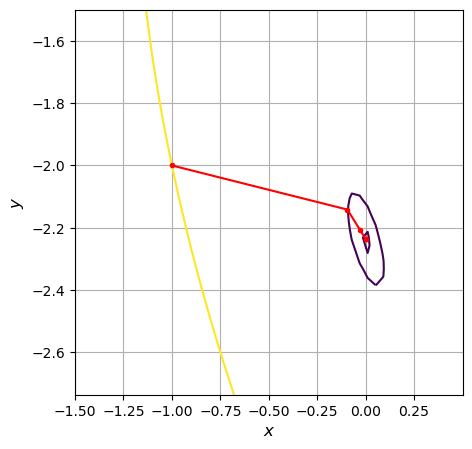


                                Мтоды покоординатного спуска 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + 5*(x**2 - y)**2
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 0.01
------------------------

                                Метод покоординатного спуска 

             Точка минимума функции:     x_min = [0.92, 0.85]
  Значение функции в точке минимума:  f(x_min) = 0.01
                Количество итераций:         k = 27
      Количество вычислений функции:       n_f = 2775


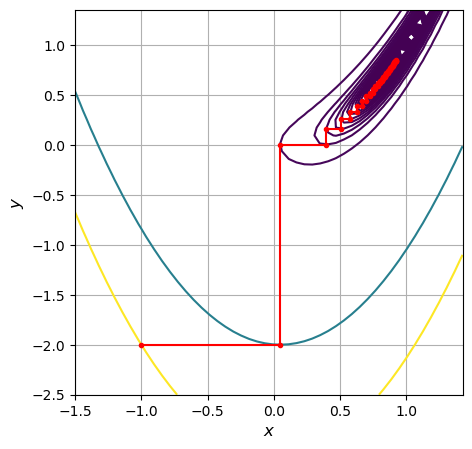


                                Метод Хука-Дживса 

             Точка минимума функции:     x_min = [0.92, 0.83]
  Значение функции в точке минимума:  f(x_min) = 0.01
                Количество итераций:         k = 20
      Количество вычислений функции:       n_f = 605


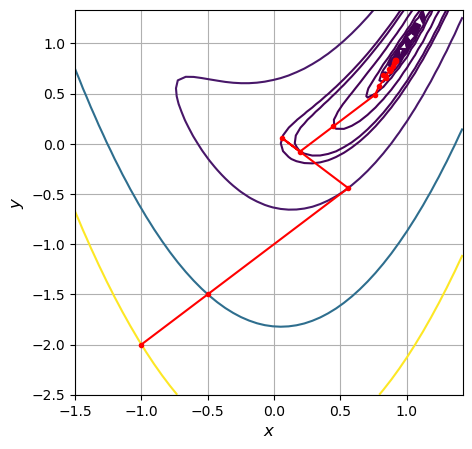


                                Метод Розенброка 

             Точка минимума функции:     x_min = [1.0, 1.0]
  Значение функции в точке минимума:  f(x_min) = 0.0
                Количество итераций:         k = 9
      Количество вычислений функции:       n_f = 522


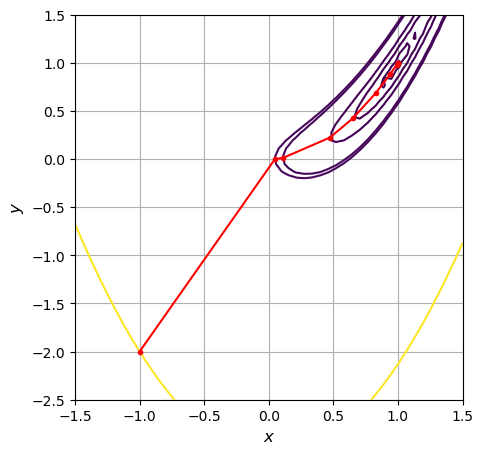

In [77]:
e_help = 2
eps = 10**(-e_help)

x0 = [-1, -2]
#foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
print_res(foo, x0, 2, 0)

alpha = 5
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22
print_res(foo, x0, 2, 1, 1)

# alpha = 20

# foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
# print_res(foo, x0, 6, 1, 1)

#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22

#foo = lambda x, y: 10*x**2 - 4* x * y + 7 * y**2 - 4 * math.sqrt(5) * (5*x - y) -16



<H1> Выводы </H1>

В результате выполнения лабораторной работы были реализованы три метода:
<ul> 
<li> метод циклического покоординатного спуска, </li>
<li> метод Хука-Дживса, </li>
<li> метод Розенброка. </li>
</ul>

Достоинством данных методов является то, что нам не требуется дифференцируемость
функции. Однако из-за этого появляются и недостатки: трудность с оценкой эффективности
методов и их точность. Метод покоординатного спуска является самым простым для
реализации, однако его простота делает его не самым эффективным по количеству вычислений
функции. Методы Хука-Дживса и Розенброка является эффективнее по данному параметру.
Наиболее выгодным является метод Хука-Дживса.
Следует отметить, что при сильно овражной функции и маленькой точности методы ПС и
Хука-Дживса ищут минимум не точно: из таблиц 3, 4 видно, что данные численные методы
могут не дать точного результата относительно значения, вычисленного аналитического (метод
ПС сошелся к точке [0.6, 0.36], Хука-Дживса к [-2.0, 4.0]). Для получения более точного
результата на сильно овражной функции следует пользоваться методом Розенброка.
Выбор точки сильно влияет на количество итераций и вычислений функции. Из
таблицы 2 мы можем видеть, что функции Розенброка в начальных точках [0, 0] и [-10, 18] для
метода ЦПС количество итераций отличается примерно в 7 раз, вычислений функции — в 7 раз,
метода Хука-Дживса количество итераций отличается примерно в 22 раза, вычислений функции
— в 33 раза, для метода Розенброка количество итераций отличается примерно в 4 раза,
вычислений функции — в 4 раза. Так же для методов ЦПС и Хука-Дживса выбор точки влияет
на полученное значение точки минимума: методы могут не сойтись к требуемой точке.
